In [1]:
import matplotlib.pyplot as plt
from collections import namedtuple as struct
from operator import itemgetter
from prettytable import PrettyTable


In [42]:
# Job = struct("Job", "name arrival_time burst_time color")
class Job:
    def __init__(self, name, arrival_time, burst_time, color):
        self.name = name
        self.arrival_time = arrival_time
        self.burst_time = burst_time
        self.color = color 
        self.waiting_time = -1
        self.turnaround_time = -1

class Plot:
    def __init__(self, job, start_time, end_time):
        self.job = job
        self.start_time = start_time 
        self.end_time = end_time

class FCFS:
    def __init__(self, jobs):
        self.fcfs = sorted(jobs, key=lambda x: x.arrival_time)
        self.plots = []
        clock = 0
        for i in range(len(self.fcfs)):
            temp = max(self.fcfs[i].arrival_time, clock)
            self.plots.append(Plot(self.fcfs[i], temp, temp + self.fcfs[i].burst_time))
            clock = temp + self.fcfs[i].burst_time

        # for i in range(len(self.plots)):
            # print(self.plots[i].job.name, self.plots[i].start_time, self.plots[i].end_time)    

    def print_gantt(self):
        fig, gnt = plt.subplots()
        gnt.set_ylim(0,1)
        gnt.set_xlim(0, self.plots[len(self.plots) - 1].end_time)
        gnt.grid(True)
        for i in range(0, len(self.plots)):
            # print(self.plots[i].job.name, self.plots[i].start_time, self.plots[i].end_time - self.plots[i].start_time)    
            gnt.broken_barh([(self.plots[i].start_time, self.plots[i].end_time - self.plots[i].start_time)], (0, 0.2), facecolors=('tab:'+self.plots[i].job.color))
            gnt.annotate(self.plots[i].job.name, (((self.plots[i].start_time + self.plots[i].end_time)/2), 0.3))

    def print_table(self):
        x = PrettyTable(["Process", "Arrival Time", "Burst Time", "Turnaround time", "Waiting time"])
        for job in self.fcfs:
            x.add_row([job.name, job.arrival_time, job.burst_time, 1, 1])
        print(x)


P2 1 6
P3 9 10
P1 34 9
+---------+--------------+------------+-----------------+--------------+
| Process | Arrival Time | Burst Time | Turnaround time | Waiting time |
+---------+--------------+------------+-----------------+--------------+
|    P2   |      1       |     6      |        1        |      1       |
|    P3   |      9       |     10     |        1        |      1       |
|    P1   |      34      |     9      |        1        |      1       |
+---------+--------------+------------+-----------------+--------------+


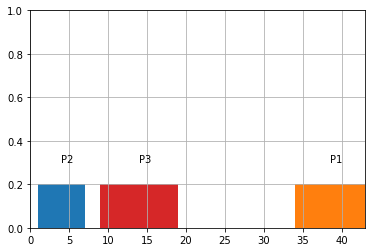

In [43]:
job_list = []
job_list.append(Job("P1", 34, 9, 'orange'))
job_list.append(Job("P2", 1, 6, 'blue'))
job_list.append(Job("P3", 9, 10, 'red'))

first_come = FCFS(job_list)
first_come.print_gantt()
first_come.print_table()